# PyTorch blitz tutorial 

## Tensor tutorial 

PyTorch is based around GPU-powered tensors, which are the same notion as numpy ndarrays. Let's see some of the basic functionalities of tensors. 

In [1]:
import torch

Torch works very much like numpy, but it leverages the power of GPUs. 

In [2]:
# initialize an empty array 

x = torch.empty(4,4)

In [3]:
x

tensor([[3.5873e-43, 3.6013e-43, 3.5873e-43, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 1.1704e-41, 0.0000e+00, 2.2369e+08],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]])

In [4]:
# initialize a random matrix, each entry is drawn from a Unif(0,1)
rand_mat = torch.rand(5, 2)

In [5]:
rand_mat

tensor([[0.3533, 0.2380],
        [0.7897, 0.1315],
        [0.6030, 0.4055],
        [0.1396, 0.2026],
        [0.3203, 0.3006]])

In [6]:
torch.long?

In [7]:
# iitialize a zeros matrix with 64bit integer
zero_mat = torch.zeros(5,2, dtype = torch.long)

In [8]:
# A single sliced element is still a tensor ! 
type(zero_mat[0])

torch.Tensor

In [9]:
zero_mat.shape

torch.Size([5, 2])

In [10]:
zero_mat.dtype

torch.int64

We can also construct a custom tensor just as in numpy. 

In [11]:
# initalize a tensor 

tensr = torch.tensor([4, 1.318])

In [12]:
tensr

tensor([4.0000, 1.3180])

There are other methods, like reusing an input tensor in the analog of `np.zeros_like` or `np.ones_like`

In [14]:
x = x.new_ones(5,3, dtype = torch.double)
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)


In [15]:
# initializes a tensor with shape of input tensor, 
# entries drawn from a std. normal distribution
x = torch.randn_like(x, dtype = torch.float)

print(x)

tensor([[ 0.0749,  1.5335,  1.5302],
        [-0.3629, -0.0477, -0.0702],
        [ 0.2095, -0.1990, -0.5140],
        [-0.8874,  0.7084, -1.5200],
        [ 0.7630, -0.9652,  0.1887]])


### Operations 

There are multiple syntaxes for operations. These are the analog of numpy having multiple operations for matrix multiplication `np.dot(x,y)`, `np.matmul(x,y)` or `x @ y`. 

In [16]:
y = torch.rand(5,3)

# syntax 1
x + y

tensor([[ 0.1386,  1.9243,  2.4603],
        [ 0.2110, -0.0361,  0.0612],
        [ 0.2895, -0.0624, -0.4269],
        [ 0.0999,  1.0217, -1.0218],
        [ 0.9273, -0.8630,  0.2767]])


In [17]:
# syntax 2 

torch.add(x,y)

tensor([[ 0.1386,  1.9243,  2.4603],
        [ 0.2110, -0.0361,  0.0612],
        [ 0.2895, -0.0624, -0.4269],
        [ 0.0999,  1.0217, -1.0218],
        [ 0.9273, -0.8630,  0.2767]])

In [18]:
# Syntax 3: addition in-place 
y.add_(x)

tensor([[ 0.1386,  1.9243,  2.4603],
        [ 0.2110, -0.0361,  0.0612],
        [ 0.2895, -0.0624, -0.4269],
        [ 0.0999,  1.0217, -1.0218],
        [ 0.9273, -0.8630,  0.2767]])

We can also index torch tensors, numpy-style ! 

In [22]:
x

tensor([[ 0.0749,  1.5335,  1.5302],
        [-0.3629, -0.0477, -0.0702],
        [ 0.2095, -0.1990, -0.5140],
        [-0.8874,  0.7084, -1.5200],
        [ 0.7630, -0.9652,  0.1887]])

In [21]:
x[:, 2]

tensor([ 1.5302, -0.0702, -0.5140, -1.5200,  0.1887])

We can use `torch.view` for reshaping a tensor. 

In [ ]:
x = torch.randn(4,4)

y = x.view(16)

z = x.view(-1, 8) # the size -1 is inferred from other dimensions 

print(x.size(), y.size(), z.size())

If we have a one element tensor, use `.item()` to get the values as a python number. 

In [24]:
x = torch.randn(1)

# Returns tensor
x

tensor([-0.3037])

In [25]:
x.item()

-0.3037445545196533

Torch has more than 100 tensor operations like random numbers (see `torch.randperm`), striding tricks, signal processing(`torch.stft`), linear algebra (`torch.det`, `torch.lu`, `torch.lstsq`), etc. [read the docs !](https://pytorch.org/docs/stable/torch.html).

### Bridging torch and numpy 

In [29]:
# initialize torch array 
a = torch.ones(5)

b = a.numpy()

type(b)

numpy.ndarray

In [30]:
a = torch.from_numpy(b)

type(a)

torch.Tensor

### CUDA tensors 

In [31]:
torch.cuda.is_available()

False

We cannot use cuda :(, though this may help us later. 

In [32]:
torch.device?

In [ ]:

if torch.cuda.is_available():
    device = torch.device("cuda")          # Initialize cuda device
    y = torch.ones_like(x, device=device)  # directly create a tensor on GPU
    x = x.to(device)                       # or just use strings ``.to("cuda")``
    z = x + y
    print(z)
    print(z.to("cpu", torch.double))       # ``.to`` can also change dtype together!

## Autograd : automatic differentiation

Of course, if we want to build neural nets, we need a powerful engine to compute gradients. PyTorch's `autograd` module is specialized for this. 

`autograd` provides automatic differentiation for tensor operations, hence its name. 

### Activating gradient operations 

`torch.Tensor` is the central class of the package. To perform gradient operations efficiently we can activate them setting the `torch.Tensor` attribute `.requires_grad` as `True`. This attribute tracks all of the tensors than need a gradient, and computes it when we call `backward()` which means backpropagation. The gradient for each tensor will be stored in the `.grad` attribute. 

To stop a tensor from tracking gradient history, we can call `.detach()`. This will save us memory and avoid making unnecesary / incorrect operations.

To prevent tracking we can also wrap the code with `torch.no_grad():`. This can be helpful when evaluating a model because the model may have trainable params with `requires_grad = True`, but for which we don't need gradients. (note-to-self: will need an example to wrap my head around this).

### Functions 

There's one more class which is essential to know - the `Function`. `Tensor` and `Function` are connected to build up an **acyclic graph**, that encodes the history of computation. Each tensor has a `.grad_fn` attribute that references a `Function` that has created the `Tensor` (except for `Tensors` created by the user- where the `grad_fn is None`).


If we want to compute the derivatives, we need to call `.backward()` on a `Tensor`. If the `Tensor` is not a scaler, we need to specify a `gradient` argument that is a tensor of matching shape, i.e. the tensor with respect to which we are taking the derivative. 

In [33]:
# initialize tensor, activate gradient operations
x = torch.ones(2,2, requires_grad = True)

x

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)

In [36]:
# perform a tensor operation 

y = x+2

y

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)

Because y was created as a result of an operation, it has a `grad_fn`. 

In [37]:
print(y.grad_fn)

In [39]:
# Confirm that is None
print(x.grad_fn)

None


Let's do more operations on y 

In [40]:
z = y*y*3

In [41]:
z

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>)

In [43]:
# Matrix multiplication 
y @ y

tensor([[18., 18.],
        [18., 18.]], grad_fn=<MmBackward>)

In [45]:
out = z.mean()

out

tensor(27., grad_fn=<MeanBackward0>)

`.requires_grad_(...)` changes an existing Tensor's `requires_grad` flag in-place. The input flag defaults to `False` if not given. 

In [46]:
a = torch.randn(2,2) 

a = ((a*3) / (a-1))

print(a.requires_grad)

False


In [47]:
a.requires_grad_(True)

print(a.requires_grad)

True


In [49]:
b = (a*a).sum()

print(b.grad_fn)

### Gradients. 

Let's apply backprop. Because `out` contains a scalar, `out.backward()`is equivalent to `out.backward(torch.tensor(1.)`.

In [50]:
out.backward()

Print gradients d(out) / dx

In [51]:
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


In [52]:
x

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)

In [53]:
out

tensor(27., grad_fn=<MeanBackward0>)

Let's call out the `out` tensor "o". We have that 

\begin{align}
o = \frac{1}{4} \sum z_i \\[.8em]
z_i = 3(x_i + 2)^2\\[.89em]
z_i\bigg\rvert_{x_i = 1} = 27
\end{align}

Therefore 

\begin{align}
\frac{do}{dx_i} = \frac{3}{2}(x_i + 2) \\[1em]
\frac{do}{dx_i}\bigg\rvert_{x_i = 1} = \frac{9}{2} = 4.5
\end{align}

If we have a vector valued function $\vec{y}$ = $f(\vec{x})$, then the gradient of $\vec{y}$ with respect to $\vec{x}$ is a Jacobian matrix  (size $m n$): 

\begin{align}
\frac{d \vec{y}}{d \vec{x}} = 
\mathbf{J} =
\begin{bmatrix}
  \frac{\partial y_1}{\partial x_1} & 
    \cdots & 
    \frac{\partial y_1}{\partial x_n} \\[1ex] % <-- 1ex more space between rows of matrix
  \vdots & 
    \ddots & 
    \vdots \\[1ex]
  \frac{\partial y_m}{\partial x_1} & 
   \cdots& 
    \frac{\partial y_m}{\partial x_n}
\end{bmatrix}
\end{align}

Generally speaking, `torch.autograd` is an engine for computing vector-Jacobian products. That is, for any given vector $\vec{v} = ( v_1, v_2, ..., v_m)^T$, compute the product $\vec{v}^T \mathbf {J}$. If $\vec{v}$ happens to be the gradient of a scalar function $l = g(\vec{y})$, that is, $\vec{v} = ( \frac{\partial l}{\partial y_1} \cdots \frac{\partial l}{\partial y_m}^T$, then by the chain rule, the vector-Jacobian product would be the gradient of $l$ with respect to $\vec x$: 

\begin{align}
\mathbf {J}^T v =
    \begin{bmatrix} 
        \frac{\partial y_1}{\partial x_1} &
        \cdots &
        \frac{\partial y_m}{ \partial x_1} \\[1ex]
        \vdots &
        \ddots &
        \vdots \\[1ex]
        \frac{ \partial y_1}{ \partial x_n} &
        \cdots &
        \frac{ \partial y_m}{ \partial x_n}\\
    \end{bmatrix}
    \begin{bmatrix}
        \frac{\partial l}{\partial y_1}\\[1ex]
        \vdots \\[1ex]
        \frac{\partial l}{\partial y_m}\\[1ex]
    \end{bmatrix}
    = 
    \begin{bmatrix}
        \frac{\partial l}{\partial x_1}\\[1ex]
        \vdots \\[1ex]
        \frac{\partial l}{\partial x_n}\\[1ex]
    \end{bmatrix}
\end{align}


Note that $v^T \mathbf J$ gives a row vector of size (1 x n), which can be treated as a column vector by taking $\mathbf {J}^T v$. 

This characteristic of vector-Jacobian product makes it very convenient to feed external gradients into a model that has a non-scalar output. Now let's take a look at an example of vector-Jacobian product: 

In [54]:
x = torch.randn(3,requires_grad = True)

In [55]:
y = x*2 


In [58]:
y.data.norm()

tensor(3.0242)

In [59]:
# Iterate until Frobenius norm is >= 1000
while y.data.norm()< 1000: 
    y *= 2

In [60]:
print(y)

tensor([-699.2209, -828.4683, 1105.5530], grad_fn=<MulBackward0>)


Now, in this case, y is no longer a scalar. `torch.autograd` could not compute the full Jacobian directly, but if we just want the vector-Jacobian product, simply pass the vector to backward as argument: 

In [61]:
v = torch.tensor([0.1, 1, 0.0001], dtype = torch.float)

y.backward(v)

In [63]:
y

tensor([-699.2209, -828.4683, 1105.5530], grad_fn=<MulBackward0>)

In [62]:
x.grad

tensor([1.0240e+02, 1.0240e+03, 1.0240e-01])

We can also stop autograd from tracking history on Tensors with `.requires_grad=True` either by wrapping the code block in `with torch.no_grad()`  or usign `.detach()`

In [64]:
print(x.requires_grad)

True


In [65]:
print((x**2).requires_grad)

True


In [66]:
with torch.no_grad(): 
    print((x**2).requires_grad)

False


In [67]:
print(x.requires_grad)

y = x.detach()

print(x.requires_grad)
print(y.requires_grad)

# Notice the elegance 
print(x.eq(y).all())

True
True
False
tensor(True)


## Neural nets 

Neural nets are constructed using the `torch.nn` module. 

`nn` dpeneds on `autograd` to define models and differentiate them. A `nn.Module` contains layers, and a method `forward(input)` that returns the `output`. 

Let's look at an example of a conv-net that classifies digits, the famous Yann Le Cunn's Le net. It is a simple feed-forward network. It takes the input, feeds it through several layers, and gives the output. 

A typical training procedure for a neural network is as follows. 

* Define the net that has some learnable params (or weights). 
* Iterate over a dataset of inputs 
* Process input through the net. 
* Compute the loss or error metric. 
* (Back)Propagate the gradients into the network's parameters. 
* Update the weights, tipically using a simple learning rule `weight (i) = weight (i-1) - learning_rate * gradient` . 

Let's define Le Net. 

In [72]:
import torch.nn as nn 

import torch.nn.functional as F

In [75]:
nn.Module.fc?

Object `nn.Module.fc` not found.


> "A convolutional layer applies the same (usually small) filter repeatedly at different positions in the layer below it. E.g. if the input layer has dimensions 512 x 512, you could have a conv layer that applies the same 8 x 8 filter (specified by 64 **filter coefficients**), at each point in (e.g.) a 128 x 128 grid overlaid on the input layer. On the other hand, each node in a fully connected layer would learn 512 x 512 weights, one for each of the nodes in the input layer" : i.e. a convolutional layer allows us to *learn a filter*. 

In [79]:
class LeNet(nn.Module): 
    
    def __init__(self): 
        super(LeNet, self).__init__()
        
        # 1 input image channel, 6 output channels, 3x3 square conv kernel 
        
        self.conv1 = nn.Conv2d(1, 6, 3)
        self.conv2 = nn.Conv2d(6, 16, 3)
        
        # an affine operation y = Wx + b 
        # fc = fully connected 
        self.fc1 = nn.Linear(16*6*6, 120) # 6*6 from image dimension 
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10) # Final output = 10 (digits)
        
    def forward(self, x): 
        
        # Max pooling over a (2,2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2,2))
        
        # If the size is a square you can only specify a single number 
        
        x =  F.max_pool2d(F.relu(self.conv2(x)), 2)
        
        # Flatten
        x = x.view(-1, self.num_flat_features(x))
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        
        x = self.fc3(x)
        
        return x 
    
    def num_flat_features(self, x): 
        
        size = x.size()[1:] # all dimensions except the batch dim
        num_features = 1
        
        for s in size: 
            num_features *=s
            
        return num_features 
    

In [83]:
net = LeNet()
print(net)

LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


Now, all what's left is to define a `forward` function and the `backward` function. You can use any of the Tensor operations in the forward function. 

In [90]:
params = list(net.parameters())
print(len(params))
print(params[0].size()) # conv1's weight

10
torch.Size([6, 1, 3, 3])


Let's try a random 32x32 input. Note: expected input sizze of LeNet is 32x32. To use this net on the MNIST dataset resize the images. 

In [93]:
input_ = torch.randn(1, 1, 32, 32)
out = net(input_)
print(out)

tensor([[-0.0274, -0.0543,  0.0122, -0.0415, -0.1333,  0.0223, -0.1412,  0.1200,
         -0.0212,  0.0013]], grad_fn=<AddmmBackward>)


Zero the gradient buffers of all parameters and backprops with random gradients:

In [92]:
net.zero_grad()

out.backward(torch.randn(1,10))

*Note*: `torch.nn` only supports mini-batches. The entire `torch.nn` package only supports inputs that are a mini-batch of samples, and not a single sample.

For example, nn.Conv2d will take in a 4D Tensor of nSamples x nChannels x Height x Width.

If you have a single sample, just use input.unsqueeze(0) to add a fake batch dimension.

Before proceeding further, let’s recap all the classes you’ve seen so far.

#### Recap 

* `torch.Tensor`: A multi-dimensional array with support for autograd operations like `backward`. Also holds the gradient w.r.t. the tensor. 

* `nn.Module` : Neural network module. Convenient way of encapsulating parameters, with helpers for moving them to GPU, exporting, loading, etc. 

* `nn.Parameter` : A kind of Tensor, that is *automatically* registered as a paameter when assigned as an attribute to a *Module*. 

* `autograd.Function`: Implements forward and backward definitions of an autograd operation. Every Tensor operation creates at least a single `Function`node that connects to functions that created a `Tensor` and *encodes* its history. 

#### Loss function 

A loss function takes the (output, target) pair of inputs, and computes a value that estimates how far away the output is from the target. You can look at a myriad of different loss functions here at the [nn module docs](https://pytorch.org/docs/stable/nn.html), or program your own ! 

There are several different **loss functions** under the `nn` package. A simple loss is: `nn.MSELoss` which computes the mean-squared error between the input and the target. 

For example: 


In [98]:
output = net(input_)
target = torch.randn(10) # a dummy target for example

target = target.view(1, -1) # to have same shape as output
criterion = nn.MSELoss()
loss = criterion(output, target)

print(loss)

tensor(1.7131, grad_fn=<MseLossBackward>)


Now, if you follow `loss` in the backward direction, using its `.grad_fn` attribute, you will see a graph of computations that looks like this: 

`input -> conv2d -> relu -> maxplool2d -> conv2d -> relu -> maxpool2d
       -> view(flatten) -> linear -> relu -> linear 
       -> MSELoss 
       -> loss`

Where `relu` is the [rectified linear unit](https://www.kaggle.com/dansbecker/rectified-linear-units-relu-in-deep-learning) activation function. 

When we call `loss.backward()`, the whole graph is differentiated w.r.t. the loss, and all Tensors in the graph that have a `requires_grad = True` will have their `.grad` Tensor accumulated with the gradient. 

For illustration, let us follow a few steps backward: 


In [101]:
print(loss.grad_fn)

print(loss.grad_fn.next_functions[0][0]) ## Linear

print(loss.grad_fn.next_functions[0][0].next_functions[0][0]) # ReLU

#### Backprop

To backprop the error all we have to do is to `loss.backward()`. You need to clear the existing gradients though, else gradients will be accumulated! 

Now we shall call `loss.backward()`, and have a look at conv1's bias gradients before and after the backward. 

In [102]:
net.zero_grad() # zeroes out the gradient buffers of all params 

In [103]:
print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
tensor([0., 0., 0., 0., 0., 0.])
conv1.bias.grad after backward
tensor([-0.0261,  0.0166,  0.0031,  0.0163,  0.0003,  0.0060])


### Update it 

The only thing left to do is to use a learning rule to update the weights torch-style. 

In [104]:
import torch.optim as optim

In [105]:
# create optimizer 

optimizer = optim.Adam(net.parameters(), lr = 1e-3)

# Do training loop 

optimizer.zero_grad()

output = net(input_)

loss = criterion(output, target)
loss.backward()

optimizer.step()

#### More on optimizers

Another thing to keep in mind is that the default optimizer is Adam (`optim.Adam`), but there are Stochastic Gradient descent (`optim.SGD`) and Adagrad (`optim.Adafrad`). 

## Training a classifier 

This is it. We've seen how to define nets, compute loss and update the weights. Let's load a dataset and test our architecture. 

### About datasets 

Remember that to input data into a torch neural net, we need to convert the input to `torch.Tensor`s. Therefore, we can use several other libraries to get the data into a numpy format and then transform it using `from_numpy` method. 

For computer vision, torch has a package called `torchvision`, that has data loaders for common datasets such as Imagenet, CIFAR10, MNIST, etc. It also has data transformers for images like `torch.utils.data.DataLoader`. This avoids making boilerplate code. 


### Training an image classifier. 

We'll do the following steps in order: 

1. Load and normalize CIFAR10 training and test datasets using `torchvision`
2. Define a ConvNet 
3. Define a loss function. 
4. Train the net. 
5. Test the net. 




#### Loading and noramlizing CIFAR10 

In [106]:
import torchvision 
import torchvision.transforms as transforms

The output of `torchvision.datasets` are PILImage images of range [0,1]. We transform them to tensors of normalized range [-1,1]. 

In [107]:
transform = transforms.Compose(
    [
        transforms.ToTensor(), 
        transforms.Normalize((0.5, 0.5, 0.5), (.5, .5, .5))
    ]
)

trainset = torchvision.datasets.CIFAR10(
    root = './data/', 
    train = True, 
    download = True, 
    transform = transform
)

Extracting ./data/cifar-10-python.tar.gz to ./data/


In [110]:
trainloader = torch.utils.data.DataLoader(
    trainset, 
    batch_size = 4, 
    shuffle = True, 
    num_workers = 2
)


In [114]:
testset = torchvision.datasets.CIFAR10(
    root = './data',
    train = False, 
    download = True, 
    transform = transform 
)

testloader = torch.utils.data.DataLoader(
    testset, 
    batch_size = 4, 
    shuffle = False, 
    num_workers = 2
)

Files already downloaded and verified


In [115]:
classes = (
    'plane', 
    'car', 
    'bird', 
    'cat', 
    'deer',
    'dog', 
    'frog', 
    'horse', 
    'ship', 
    'truck'
)

In [116]:
import matplotlib.pyplot as plt 

In [139]:
images, labels = dataiter.next()

In [140]:
labels

tensor([0, 3, 9, 4])

In [141]:
images.shape

torch.Size([4, 3, 32, 32])

plane ship deer  dog


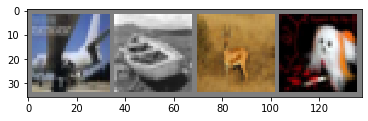

In [119]:
def imshow(img): 
    img = img/2 + 0.5 # unnormalize 
    
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))
    
# Get some random training images    
dataiter = iter(trainloader)

images, labels = dataiter.next()

# show images 

imshow(torchvision.utils.make_grid(images))

print(''.join('%5s' % classes[labels[j]] for j in range(4)))

#### Define a conv net

We'll use the same neural net but modify it to take 3-channel images. 

In [131]:
class laNets(nn.Module): 
    def __init__(self): 
        super(laNets, self).__init__()
        
        # Input channels, output channels, size of conv filter 5x5
        self.conv1 = nn.Conv2d(3,6,5)
        
        # Subsample by max operator 
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        
        # Output channels x conv filter size
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x): 
        
        # subsample Conv layers
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        
        x = x.view(-1, 16*5*5) # flatten for fully connected layer 
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        
        return x


In [132]:
# LeNet chilango-style
net = laNets()

#### Define loss function and optimizer. 

In [133]:
cross_entropy = nn.CrossEntropyLoss()

optimizer = optim.Adam(net.parameters(), lr = 1e-3)

#### Train the net 

In [147]:
for epoch in np.arange(2): # Loop over dataset multiple times 
    
    running_loss = 0.0
    
    for ix, data in enumerate(trainloader):
        
        # Get the inputs; data is a list of [inputs, labels]
        
        inputs, labels = data
        
        #print(labels)
        
        # zero the param gradients 
        optimizer.zero_grad()
        
        # forward + backward + optimize
        outputs = net(inputs)
        
        #print(outputs)
        
        # Compute cross entropy 
        loss = cross_entropy(outputs, labels)
        
        loss.backward() #backprop
        
        optimizer.step() # Update weights 
        
        # print stats 
        
        running_loss += loss.item()
        
        if ix % 2000 == 1999: # print every 2000 mini-batches
            
            # Slightly awkward print statement 
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, ix+1, running_loss / 2000))
            
            running_loss = 0.0
            
print('Finished training')

[1,  2000] loss: 1.737
[1,  4000] loss: 1.568
[1,  6000] loss: 1.500
[1,  8000] loss: 1.430
[1, 10000] loss: 1.371
[1, 12000] loss: 1.355
[2,  2000] loss: 1.273
[2,  4000] loss: 1.272
[2,  6000] loss: 1.268
[2,  8000] loss: 1.274
[2, 10000] loss: 1.249
[2, 12000] loss: 1.211
Finished training


We can see that indeed, the cross entropy steadily decreased during the training procedure. 

We can save our model with:

In [ ]:
# PATH = './cifar_net.pth'
# torch.save(net.state_dict(), PATH)

#### Test the network on the test data 

We have trained the network for 2 passes over the training set. But we need to check if the net has learnt anything at all. 

Let's check by predicting the outputs, and checking it against the ground truth. 

In [148]:
classes

('plane',
 'car',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck')

Ground truth :    cat   ship   ship  plane 


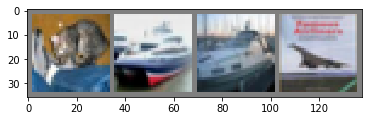

In [149]:
test_dataiter = iter(testloader)

images, labels = test_dataiter.next()

# print images 

imshow(torchvision.utils.make_grid(images))

# 4 is the batch size 
print('Ground truth : ', ' '.join('%5s '% classes[labels[j]] for j in range(4) ))

Let's look at how the network performs on the whole dataset. 

In [150]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 54 %


That looks way better than chance, which is 10% accuracy (randomly picking a class out of 10 classes). Seems like the network learnt something.

Hmmm, what are the classes that performed well, and the classes that did not perform well:



In [151]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))


Accuracy of plane : 49 %
Accuracy of   car : 73 %
Accuracy of  bird : 48 %
Accuracy of   cat : 63 %
Accuracy of  deer : 27 %
Accuracy of   dog : 30 %
Accuracy of  frog : 57 %
Accuracy of horse : 54 %
Accuracy of  ship : 77 %
Accuracy of truck : 61 %


We can see that the network gets confused by cats, deer, and dogs. An easy fix is to let the network train for more epochs. 

#### Training on a GPU

Just how we transfer a Tensor onto a GPU, we can transfer the whole neural net onto the GPU.

In [152]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cpu


Now all we have to do is pass every object with a  `to(device)` method. 

In [ ]:
# net.to(device)

# inputs, labels = data[0].to(device), data[1].to(device)

Massive speedups are achieved when we start scaling up to larger networks. We can also go parallel ! Check the [parallel tutorial](https://pytorch.org/tutorials/beginner/blitz/data_parallel_tutorial.html) for getting all of that GPU juice ;)